In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#TRAIN TITANIC DATASET
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h1>VISUALIZATION</h1>

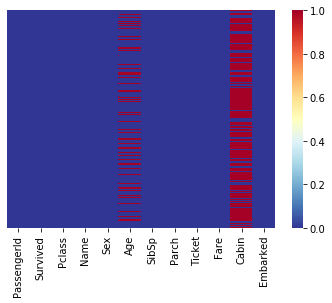

In [6]:
#LOCATING MISSING VALUES IN DATA
sns.heatmap(df.isnull(),cmap="RdYlBu_r",yticklabels=False)

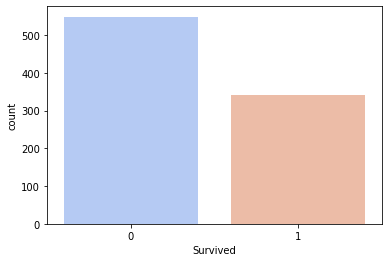

In [7]:
sns.countplot(x='Survived',data=df,palette='coolwarm')

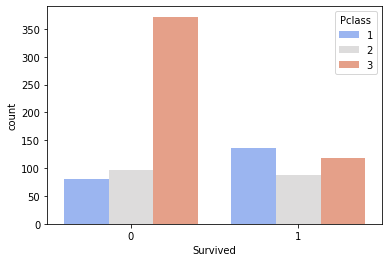

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='coolwarm')

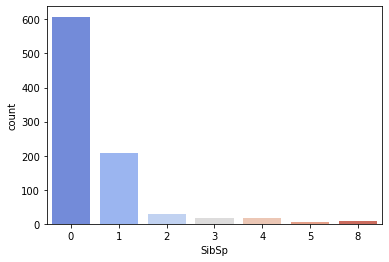

In [9]:
sns.countplot(x='SibSp',data=df,palette='coolwarm')

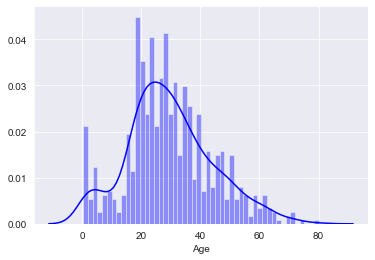

In [10]:
sns.set_style(style="darkgrid")
sns.distplot(df['Age'].dropna(),bins=50,color="blue")

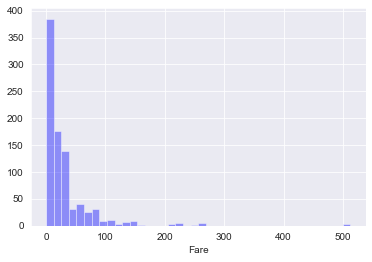

In [11]:
sns.distplot(df['Fare'],bins=40,kde=False,color="blue")

<h1>DATA PREPROCESSING</h1>

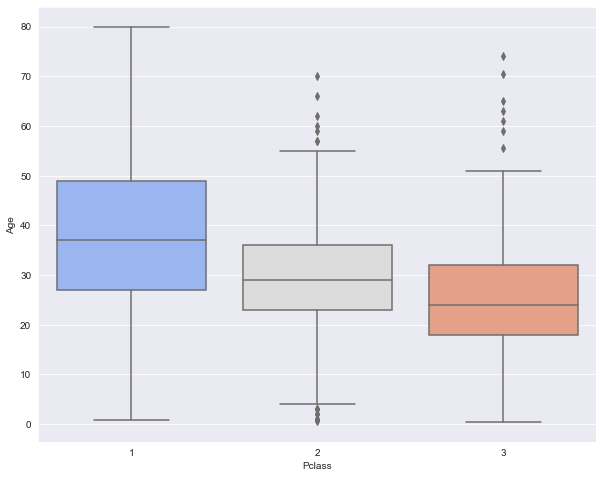

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Pclass",y="Age",data=df,palette="coolwarm")

In [13]:
def findAge(col):
    if pd.isnull(col['Age']):
        if(col['Pclass']==1):
            return 38
        elif(col['Pclass']==2):
            return 29
        else:
            return 25
    else:
        return col['Age']

In [14]:
# col=df[['Pclass','Age']]
# (a,b,c)=col.groupby('Pclass')['Age'].mean()             38.233440860215055 29.87763005780347 25.14061971830986
df['Age'] = df[['Age','Pclass']].apply(findAge,axis=1)

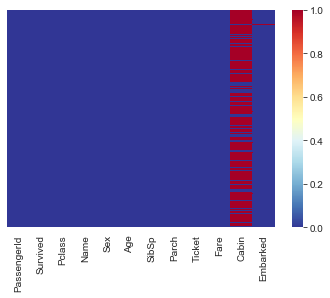

In [15]:
sns.heatmap(df.isnull(),cmap="RdYlBu_r",yticklabels=False)

In [16]:
df.drop('Cabin',axis=1,inplace=True)

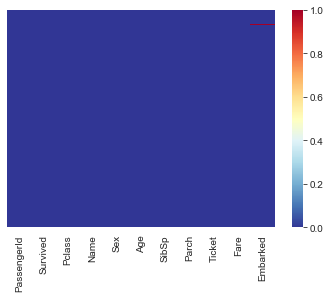

In [17]:
sns.heatmap(df.isnull(),cmap="RdYlBu_r",yticklabels=False)

In [18]:
df.dropna(inplace=True)

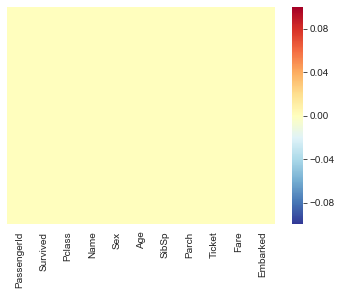

In [19]:
sns.heatmap(df.isnull(),cmap="RdYlBu_r",yticklabels=False)

<h1>REPLACING WITH DUMMY VARIABLES</h1>

In [20]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [21]:
df.drop(['Name','Ticket','Sex','Embarked'],axis=1,inplace=True)

In [22]:
df=pd.concat([df,sex,embark],axis=1)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
df.drop('PassengerId',axis=1,inplace=True)

In [25]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<h1>BUILDING LOGISTIC MODEL</h1>

In [26]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr=LogisticRegression(max_iter=200)

In [31]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
prediction=lr.predict(X_test)

<h1>Evaluation</h1>

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm=confusion_matrix(y_test,prediction)
cm

array([[150,  13],
       [ 31,  73]], dtype=int64)

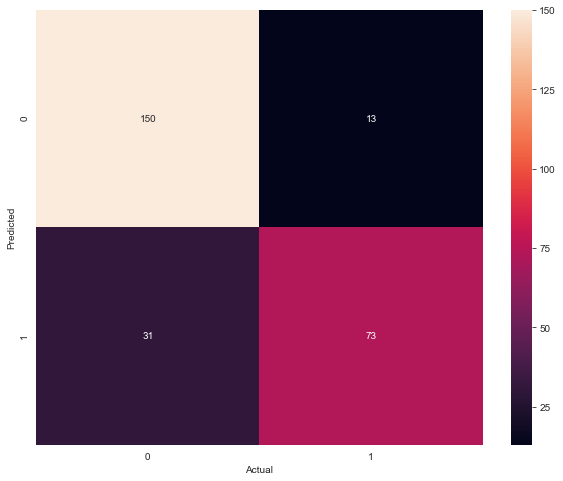

In [36]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
sns.set(font_scale=4)